# <div align="center"> COSC 2673/2793 | Machine Learning </div>
## <div align="center"> Assignment 2 - Joseph Packham (s3838978) and Kylie Nguyen (s3946026) </div>

# Introduction
This report will cover the process of producing a machine learning model that will predict energy usage...

In [67]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [68]:
#read in CSV file and display first 5 rows
energyUse_df = pd.read_csv('./dataset/UCI-electricity/UCI_data.csv', delimiter=',')
energyUse_df.head()

,date,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy
0,2016-04-19 20:30:00,22.200000,39.500000,20.566667,37.656667,22.230000,37.030000,22.318571,36.610000,20.633333,...,33.90,9.70,766.100000,65.5,3.500000,40.000000,3.350000,24.061869,24.061869,60
1,2016-03-05 04:40:00,20.356667,37.126667,17.566667,40.230000,20.890000,37.663333,18.700000,36.260000,18.463333,...,41.09,0.30,740.333333,99.0,1.000000,41.333333,0.100000,4.622052,4.622052,50
2,2016-03-14 12:40:00,20.926667,38.790000,21.100000,35.526667,21.600000,36.290000,21.000000,34.826667,18.100000,...,38.76,4.40,768.466667,72.0,6.000000,22.666667,-0.266667,5.635898,5.635898,80
3,2016-01-22 15:30:00,18.290000,38.900000,17.290000,39.260000,18.390000,39.326667,16.100000,38.790000,16.100000,...,39.20,3.35,760.600000,82.0,5.500000,41.000000,0.500000,49.216445,49.216445,40
4,2016-02-10 00:40:00,22.290000,42.333333,21.600000,40.433333,22.666667,43.363333,19.100000,40.900000,19.290000,...,43.73,3.20,738.900000,88.0,7.333333,56.000000,1.400000,47.617579,47.617579,60


# Exploratory Data Analysis
To start off, the data is first investigated through EDA. It is observed that the shape of the dataframe is 19735 rows of data with 28 columns, where 1 column is the target variable (energy usage in Wh), and the remaining columns are the attributes. According to the description of the data, these attributes cover the temperature and humidity of different rooms in the house, as well as outside, along with a few other weather related variables such as pressure and windspeed. It is noted that there are two variables listed as "Random Variable". Using the .info() function, it is confirmed that there are no null values within the dataset.

In [69]:
#check for any null values, using shape to compare
print("Shape of Energy Use dataframe: ", energyUse_df.shape, "\n")

energyUse_df.info()

Shape of Energy Use dataframe:  (19735, 28) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           19735 non-null  object 
 1   T1             19735 non-null  float64
 2   RH_1           19735 non-null  float64
 3   T2             19735 non-null  float64
 4   RH_2           19735 non-null  float64
 5   T3             19735 non-null  float64
 6   RH_3           19735 non-null  float64
 7   T4             19735 non-null  float64
 8   RH_4           19735 non-null  float64
 9   T5             19735 non-null  float64
 10  RH_5           19735 non-null  float64
 11  T6             19735 non-null  float64
 12  RH_6           19735 non-null  float64
 13  T7             19735 non-null  float64
 14  RH_7           19735 non-null  float64
 15  T8             19735 non-null  float64
 16  RH_8           19735 non-null  float64
 17  T9  

Using the describe function, the count, mean, standard deviation, quantiles and the minimum and maximum values of the data are returned. With these values it is seen that, although the range of the values among the variables regarding humidity and temperature are relatively similar, there are cases where the range differs greatly. For example, the range of Windspeed is between 0-14, whereas the range of target energy is between 10-1110. This suggests that feature scaling should be done later in the process, as the differing ranges may cause problems or confuse the learning algorithms.

In [70]:
energyUse_df.describe()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,...,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,101.496833
std,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,...,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,104.380829
min,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,...,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,10.000000
25%,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,...,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,50.000000
50%,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,...,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,60.000000
75%,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,...,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,100.000000
max,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,...,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,1110.000000


# Data distribution
In order to observe the distributions of each variable, histograms are plotted for the variables other than date, as the date variable is of type object and cannot be plotted.

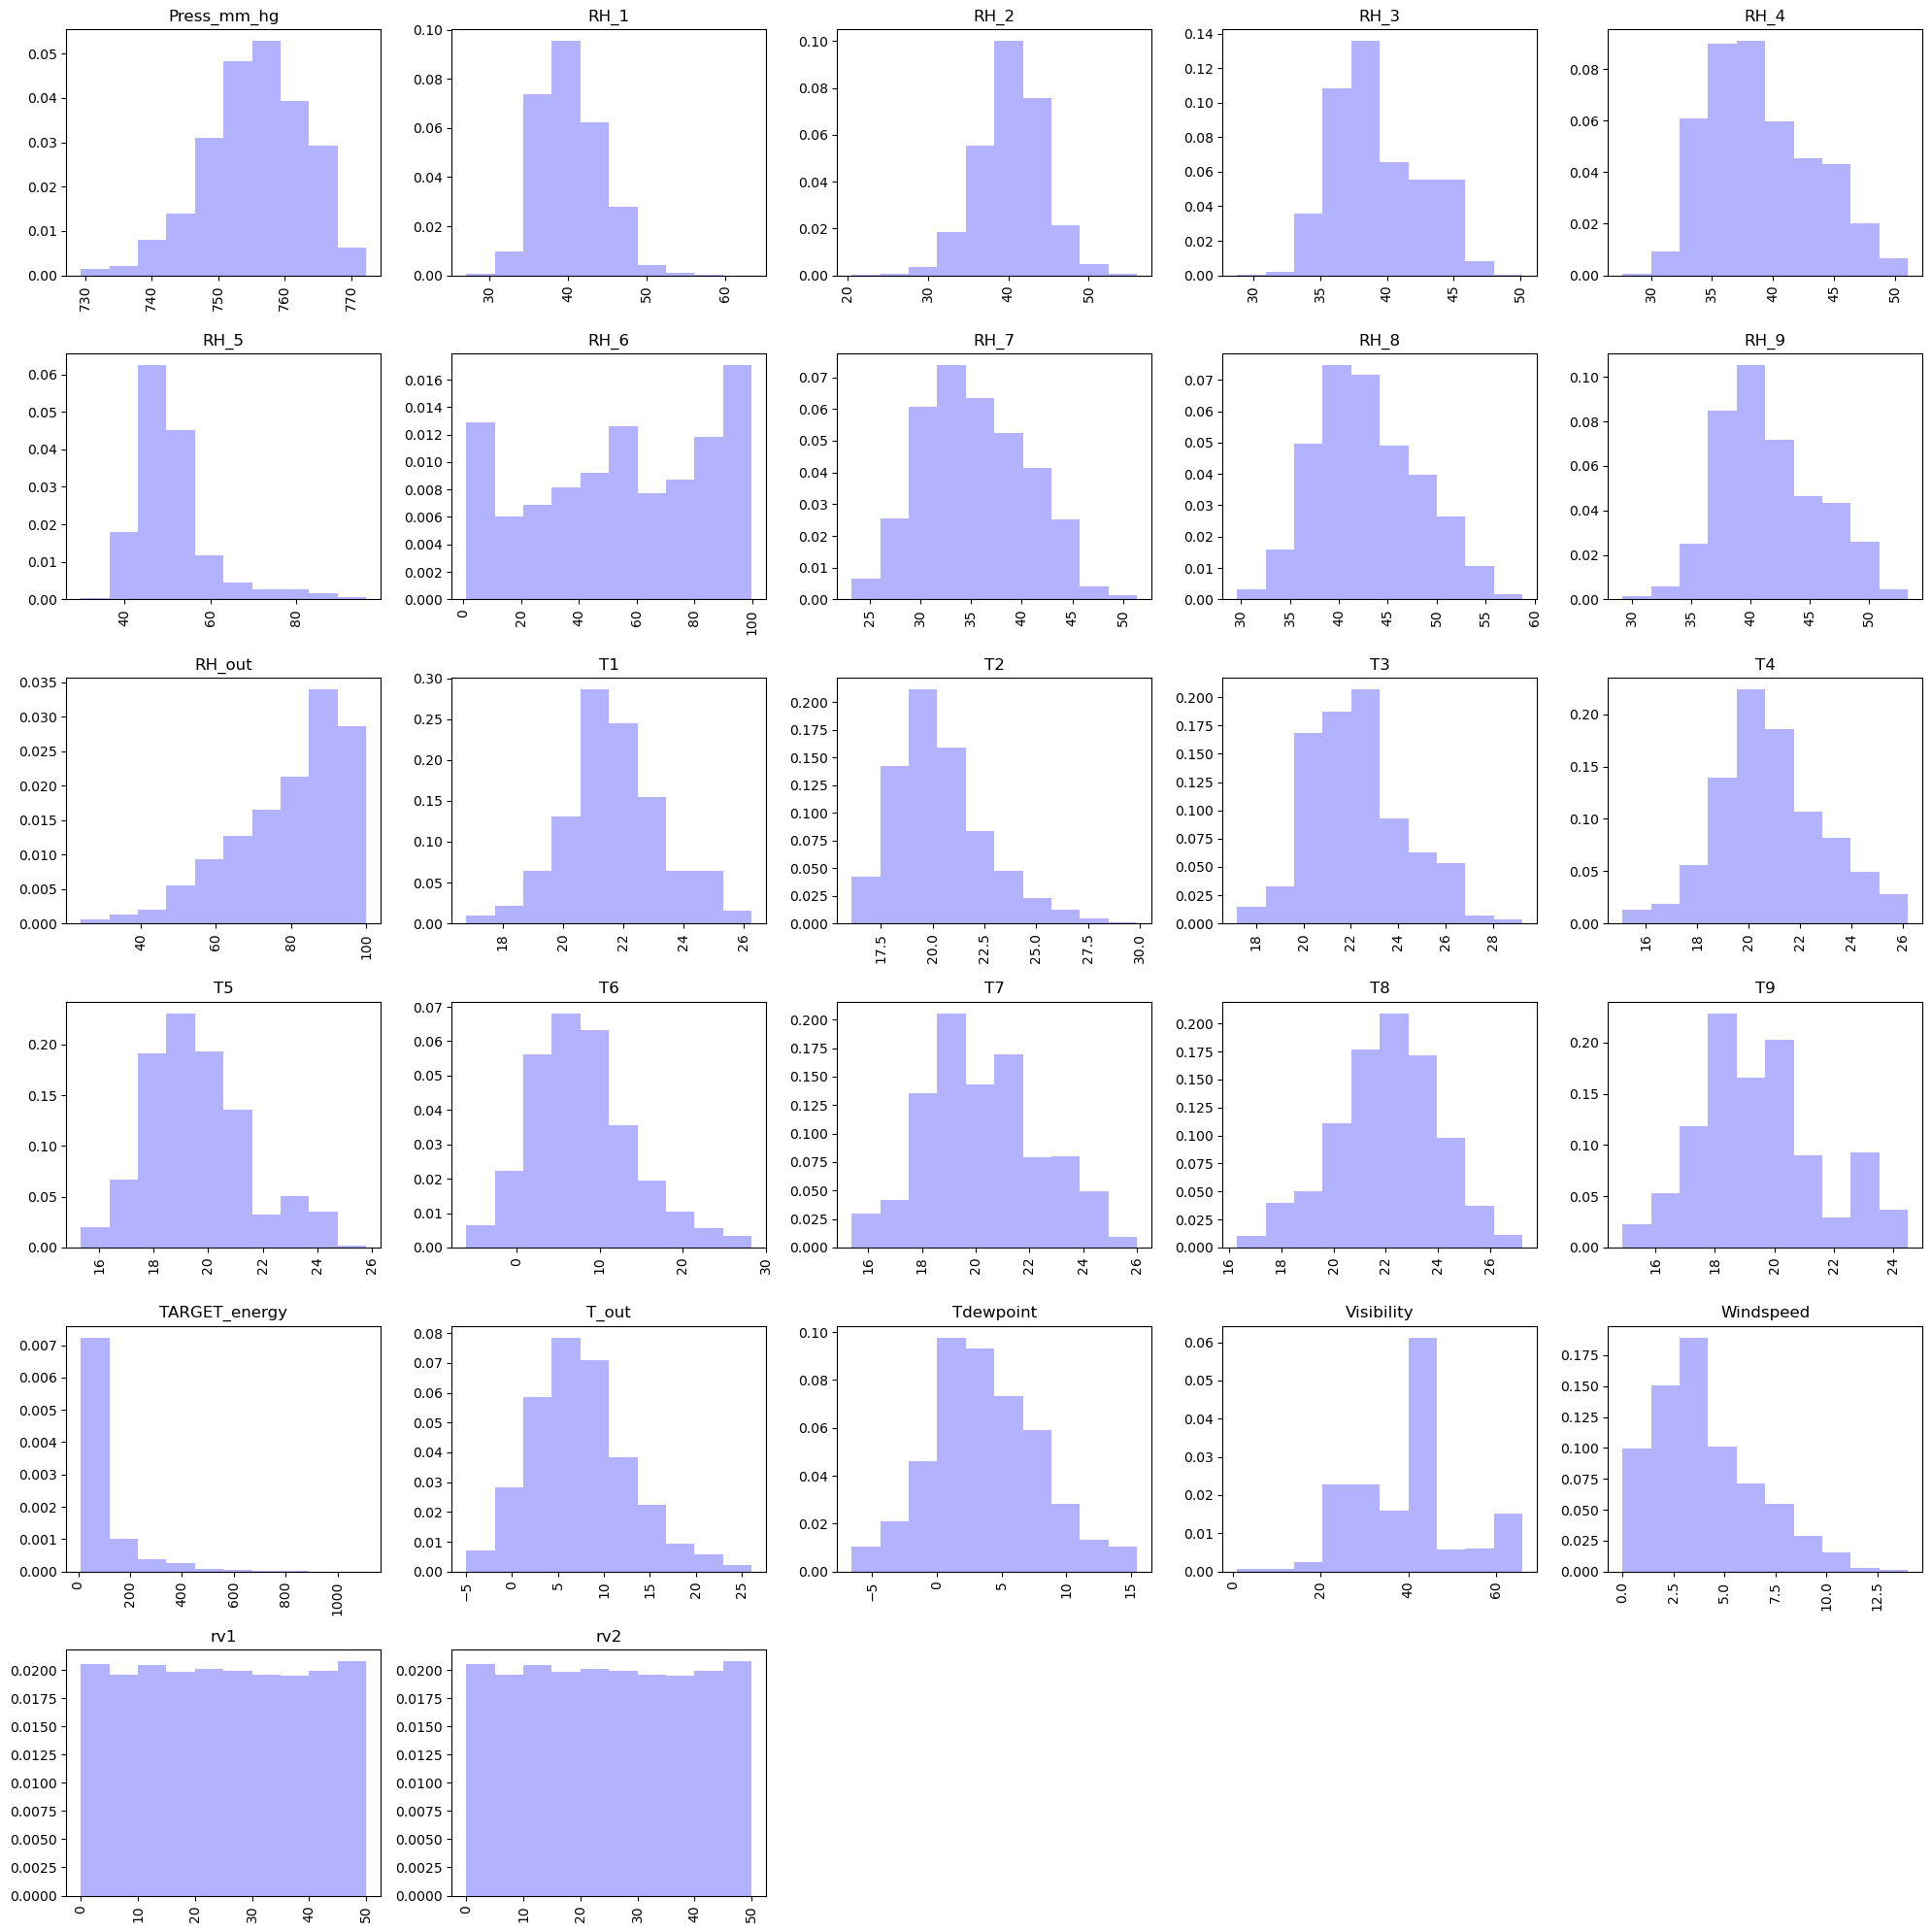

In [71]:
#get list of columns other than date
columns = (energyUse_df.columns).difference(['date'])
#plot histogram for all variables other than date
plt.figure(figsize=(20,20))
for i, column in enumerate(columns):
    plt.subplot(6,5,i+1)
    plt.hist(energyUse_df[column], alpha=0.3, color='b', density=True)
    plt.title(column)
    plt.xticks(rotation='vertical')
    plt.tight_layout()

> **Observations:**
> - There are a number of attributes that appear to be skewed, eg. RH_5, RH_Out, T2 etc.
> - The two random variables are very evenly distributed.

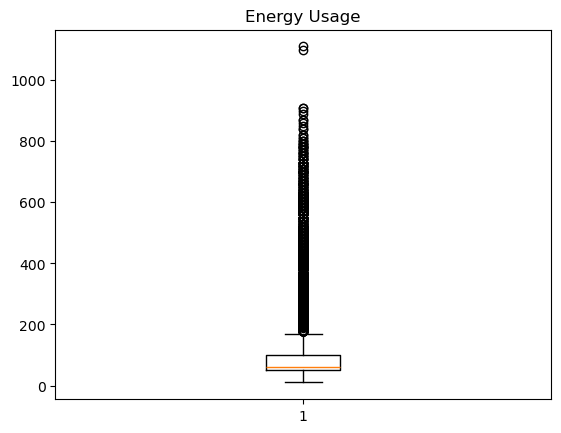

In [72]:
#display boxplot for the target, energy usage, variable
plt.boxplot(energyUse_df['TARGET_energy'])
plt.title('Energy Usage')
plt.show()

Upon displaying the boxplot for the target variable, it is observed that there are a number of outliers above the lower limit. These values will be dropped as to prevent these dramatically different values from affecting the model. The outliers are dropped using the IQR method, which appears to have not removed two outliers, as they are within the lower and upper limits. Another method of dropping the outliers was not attempted due to the restrictions placed by the course.


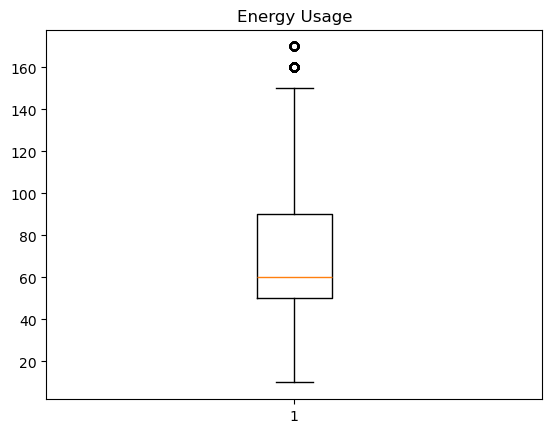

In [73]:
#get the quantiles and IQR
q1 = energyUse_df['TARGET_energy'].quantile(0.25)
q3 = energyUse_df['TARGET_energy'].quantile(0.75)
IQR = q3-q1

#calculate lower and upper limits
lowerLimit = q1 - (1.5*IQR)
upperLimit = q3 + (1.5*IQR)

#get rid of rows with outliers from the dataframe
energyUse_df = energyUse_df.loc[(energyUse_df['TARGET_energy'] > lowerLimit) & (energyUse_df['TARGET_energy'] < upperLimit)]

#display boxplot without outliers
plt.boxplot(energyUse_df['TARGET_energy'])
plt.title('Energy Usage')
plt.show()

In [74]:
energyUse_df.shape

(17525, 28)

# Relationship between variables
Using scatterplots, the relationship between the target variable, Energy Usage, against the other attributes in the dataframe is explored.

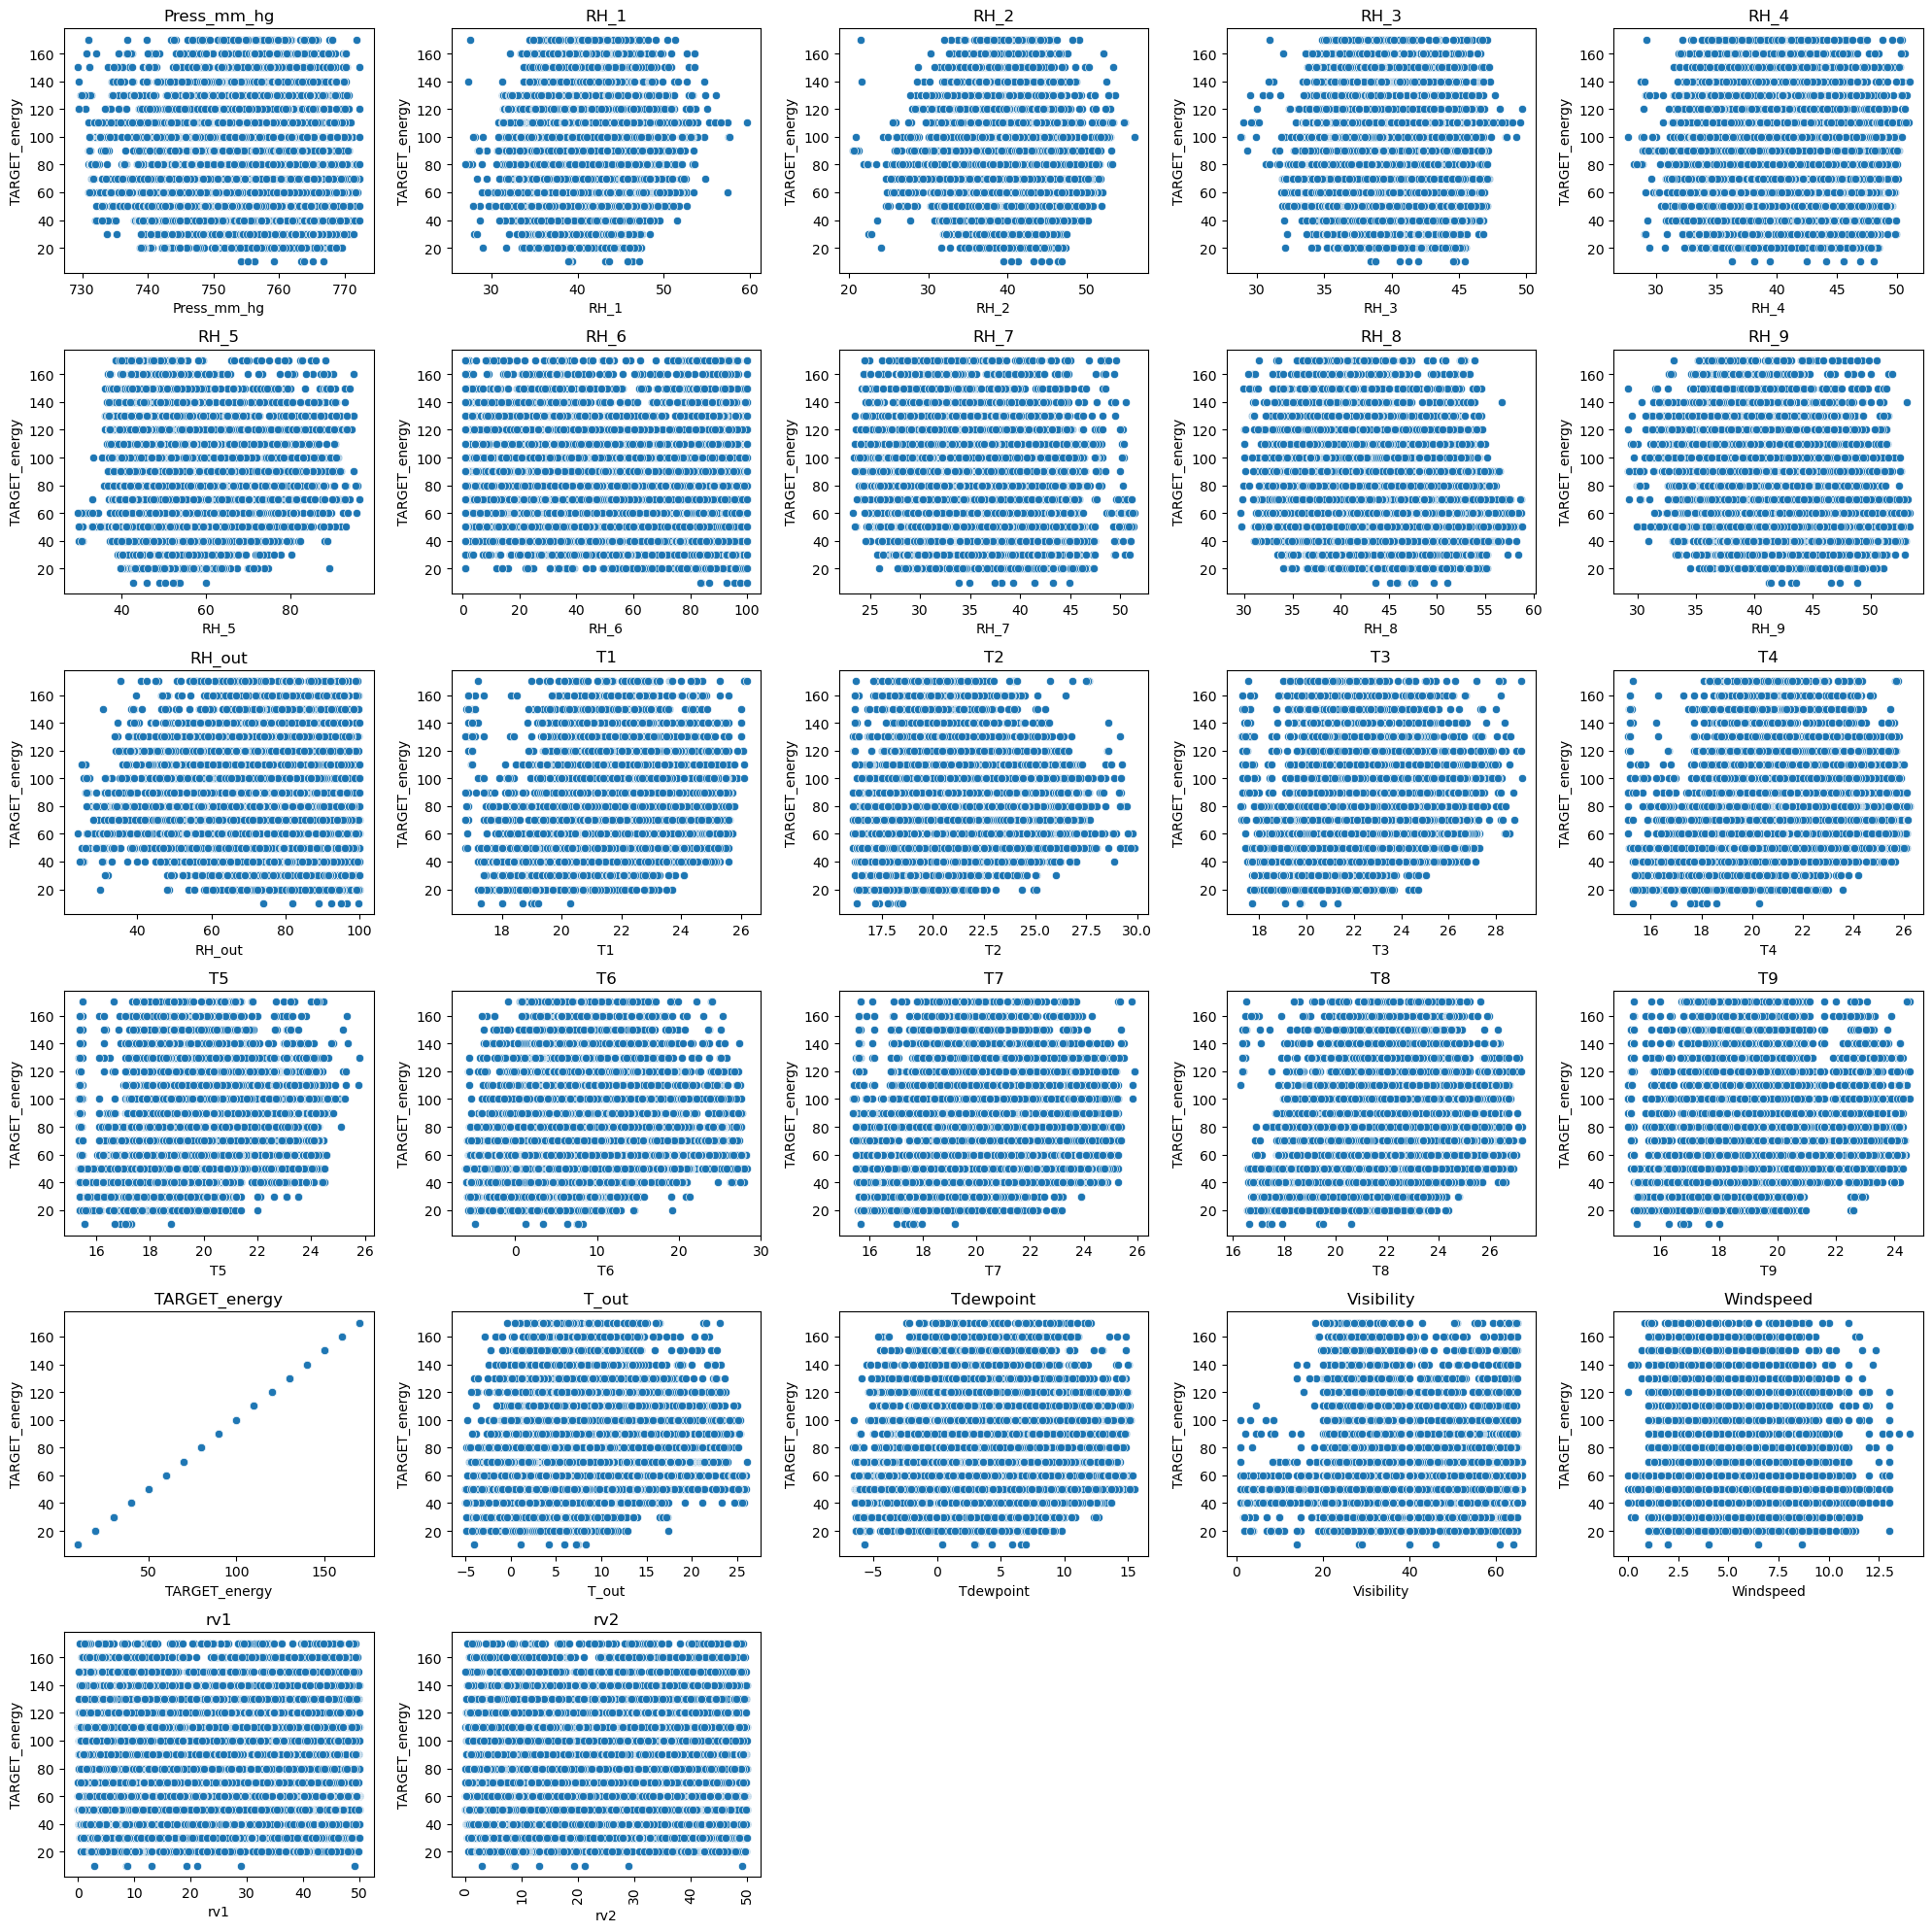

In [75]:
#import seaborn package for plotting scatterplots
import seaborn as sns

#plot scatterplots for all features against target variable
plt.figure(figsize=(20,20))
for i, column in enumerate(columns):
    plt.subplot(6,5, i+1)
    sns.scatterplot(data=energyUse_df, x=column, y='TARGET_energy')
    plt.title(column)

plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

[Text(0.5, 0, 'T1'),
 Text(1.5, 0, 'RH_1'),
 Text(2.5, 0, 'T2'),
 Text(3.5, 0, 'RH_2'),
 Text(4.5, 0, 'T3'),
 Text(5.5, 0, 'RH_3'),
 Text(6.5, 0, 'T4'),
 Text(7.5, 0, 'RH_4'),
 Text(8.5, 0, 'T5'),
 Text(9.5, 0, 'RH_5'),
 Text(10.5, 0, 'T6'),
 Text(11.5, 0, 'RH_6'),
 Text(12.5, 0, 'T7'),
 Text(13.5, 0, 'RH_7'),
 Text(14.5, 0, 'T8'),
 Text(15.5, 0, 'RH_8'),
 Text(16.5, 0, 'T9'),
 Text(17.5, 0, 'RH_9'),
 Text(18.5, 0, 'T_out'),
 Text(19.5, 0, 'Press_mm_hg'),
 Text(20.5, 0, 'RH_out'),
 Text(21.5, 0, 'Windspeed'),
 Text(22.5, 0, 'Visibility'),
 Text(23.5, 0, 'Tdewpoint'),
 Text(24.5, 0, 'rv1'),
 Text(25.5, 0, 'rv2'),
 Text(26.5, 0, 'TARGET_energy')]

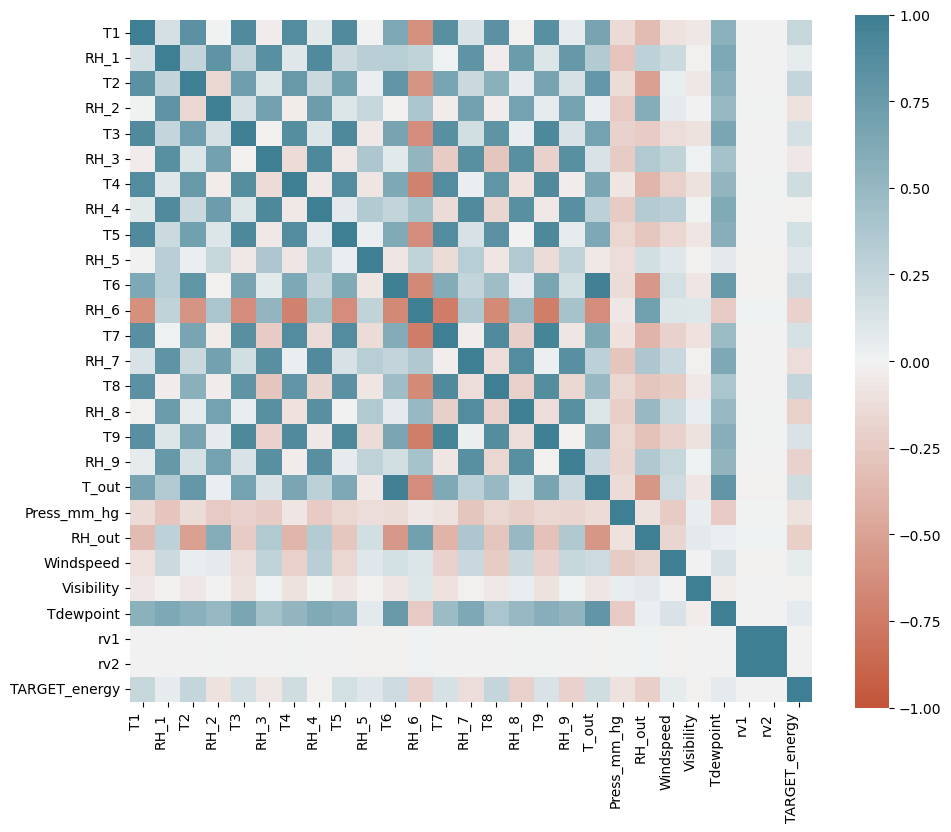

In [76]:
#get df without date column
energyUse_df_noDate = energyUse_df.drop(columns=['date'])

#plot correlation plot
f, ax = plt.subplots(figsize=(11, 9))
corr = energyUse_df_noDate.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
)

> **Observations:**
> - Variables relating to temperature are highly positively correlated with each other, and variables that are related to humidity are similarly, highly positively correlated with each other.
> - Variables involving temperature generally have either a slight positive, or slight negative correlation with variables involving humidity.
> - RH_6, the humidity outside the building (northside) seems to be quite negatively correlated with variables regarding temperature.
> - The two random variables do not seem to be correlated with any other variable other being highly correlated with themselves as well as each other.

# Non-Neural Network - Linear Regression

### Data Splitting

In [136]:
from sklearn.model_selection import train_test_split

#split the dataset into 70% train and 15% test and 15% val
with pd.option_context('mode.chained_assignment', None):
    LR_train, LR_test = train_test_split(energyUse_df, test_size=0.3, shuffle=True, random_state = 42)
    LR_test, LR_val = train_test_split(LR_test, test_size=0.5, shuffle=True, random_state = 42)

#Separate the target and the attributes
LR_X_train = LR_train.drop(['TARGET_energy', 'date'], axis=1)
LR_y_train = LR_train['TARGET_energy']

LR_X_test = LR_test.drop(['TARGET_energy', 'date'], axis=1)
LR_y_test = LR_test['TARGET_energy']

LR_X_val = LR_val.drop(['TARGET_energy', 'date'], axis=1)
LR_y_val = LR_val['TARGET_energy']

print("LR_X_train shape: ", LR_X_train.shape)
print("LR_y_train shape: ", LR_y_train.shape)
print("LR_X_test shape: ", LR_X_test.shape)
print("LR_y_test shape: ", LR_y_test.shape)
print("LR_X_val shape: ", LR_X_val.shape)
print("LR_y_val shape: ", LR_y_val.shape)


LR_X_train shape:  (12267, 27)
LR_y_train shape:  (12267,)
LR_X_test shape:  (2629, 27)
LR_y_test shape:  (2629,)
LR_X_val shape:  (2629, 27)
LR_y_val shape:  (2629,)


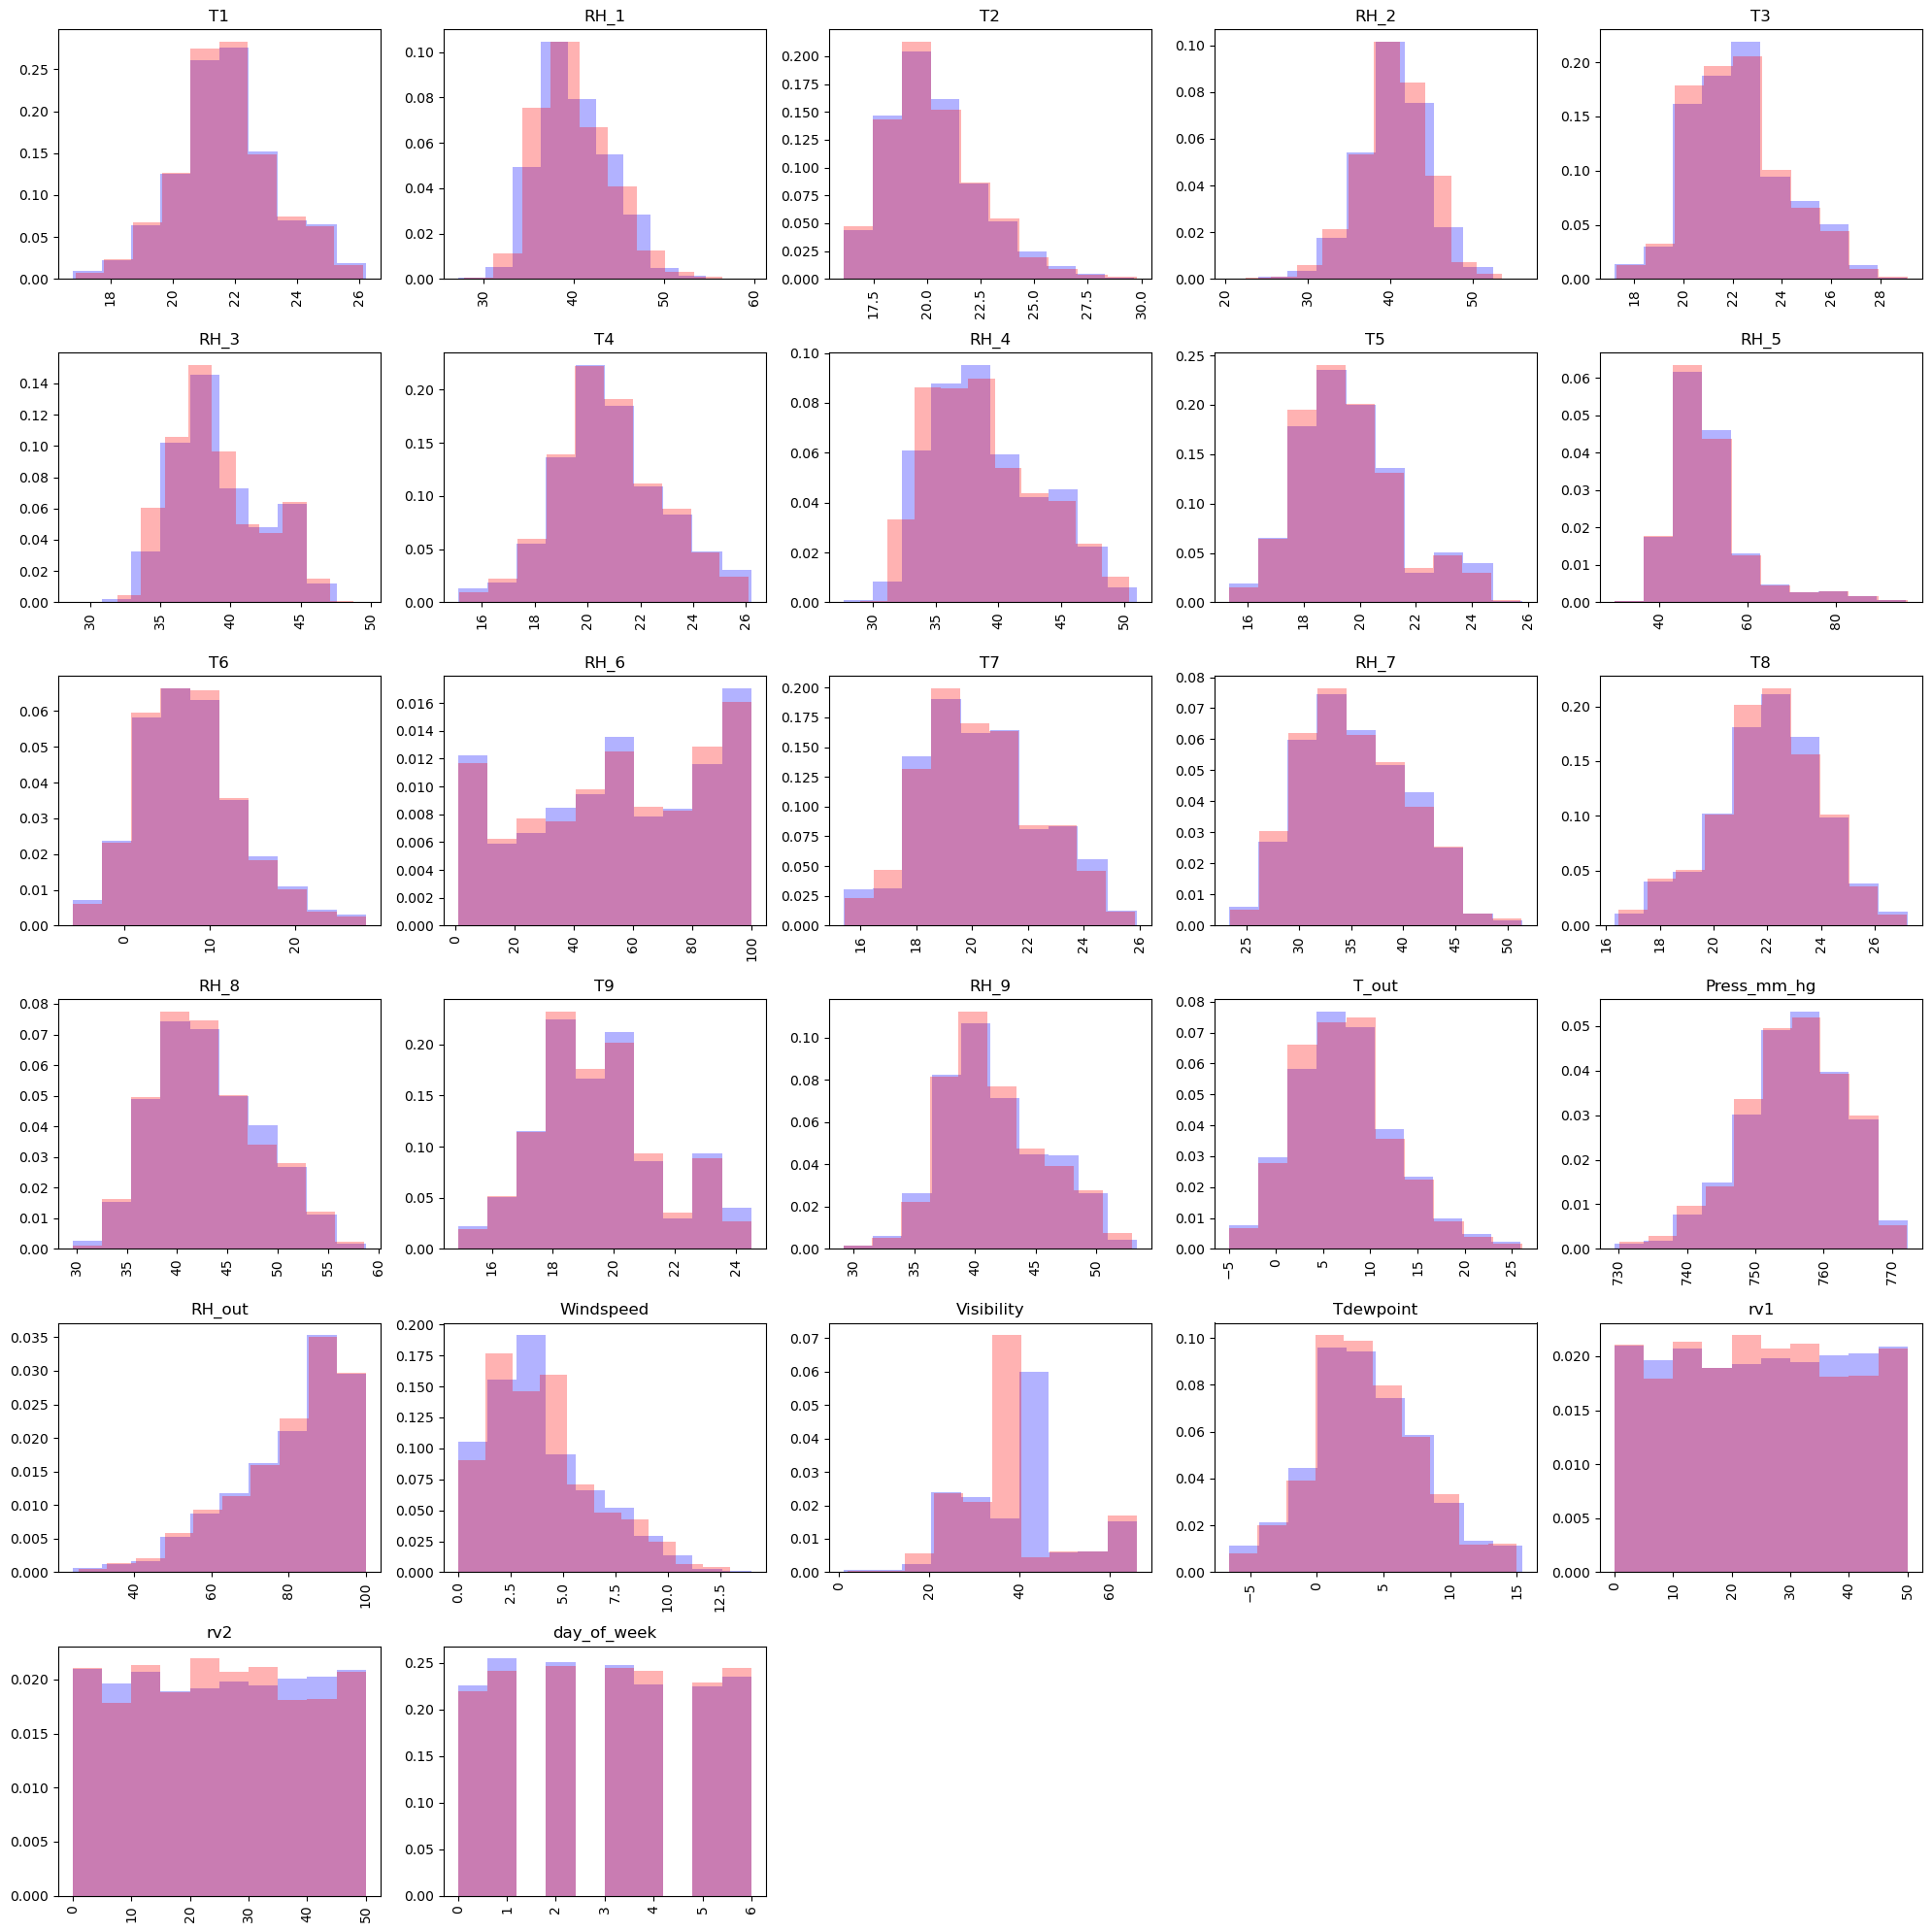

In [118]:
energyUse_df_X = energyUse_df.drop(['TARGET_energy', 'date'], axis=1)

#plotting histograms of both training and test datasets
plt.figure(figsize=(20,20))
for i, col in enumerate(energyUse_df_X.columns):
    plt.subplot(6,5,i+1)
    plt.hist(LR_X_train[col], alpha=0.3, color='b', density=True)
    plt.hist(LR_X_test[col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')
    plt.tight_layout()

### Base Model, Unscaled Data

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math

#unscaled
model_us_lr = LinearRegression().fit(LR_X_train, LR_y_train)
LR_y_val_pred_US = model_us_lr.predict(LR_X_val)

r2_us_lr = r2_score(LR_y_val, LR_y_val_pred_US)
print('The R^2 score for the linear regression model (without feature scaling) is: {:.3f}'.format(r2_us_lr))

MSE_us_lr = np.square(np.subtract(LR_y_val,LR_y_val_pred_US)).mean() 
RMSE_us_lr = math.sqrt(MSE_us_lr)

print('The RMSE score for the linear regression model (without feature scaling) is: {:.3f}'.format(RMSE_us_lr))

The R^2 score for the linear regression model (without feature scaling) is: 0.320
The RMSE score for the linear regression model (without feature scaling) is: 24.743


C:\Users\kylie\AppData\Local\Temp\ipykernel_14956\2250670564.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  energyUse_LinearRegression.scatter(LR_y_val, LR_y_val_pred_US, s=25, cmap=plt.cm.coolwarm, zorder=10)


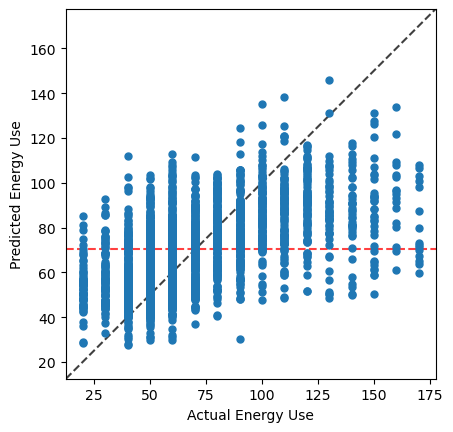

In [140]:
#predicting using linear model and plotting predicted vs actual values

fig, energyUse_LinearRegression = plt.subplots()
energyUse_LinearRegression.scatter(LR_y_val, LR_y_val_pred_US, s=25, cmap=plt.cm.coolwarm, zorder=10)

lims = [
    np.min([energyUse_LinearRegression.get_xlim(), energyUse_LinearRegression.get_ylim()]),
    np.max([energyUse_LinearRegression.get_xlim(), energyUse_LinearRegression.get_ylim()]),
]

energyUse_LinearRegression.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
energyUse_LinearRegression.plot(lims, [np.mean(LR_y_train),]*2, 'r--', alpha=0.75, zorder=0)
energyUse_LinearRegression.set_aspect('equal')
energyUse_LinearRegression.set_xlim(lims)
energyUse_LinearRegression.set_ylim(lims)

plt.xlabel('Actual Energy Use')
plt.ylabel('Predicted Energy Use')

plt.show()

C:\Users\kylie\AppData\Local\Temp\ipykernel_14956\3578625995.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(LR_y_val, LR_y_val-LR_y_val_pred_US, s=25, cmap=plt.cm.coolwarm, zorder=10)


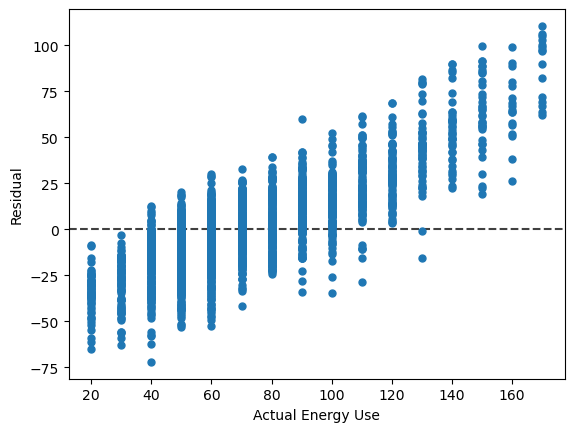

In [141]:
fig, ax = plt.subplots()
ax.scatter(LR_y_val, LR_y_val-LR_y_val_pred_US, s=25, cmap=plt.cm.coolwarm, zorder=10)

xlims = ax.get_xlim()
ax.plot(xlims, [0.0,]*2, 'k--', alpha=0.75, zorder=0)
ax.set_xlim(xlims)

plt.xlabel('Actual Energy Use')
plt.ylabel('Residual')

plt.show()

### Feature Scaling

In [106]:
#scaling all features, normalising skewed features
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

logNorm_attributes = ['RH_1', 'T2', 'T3', 'RH_3', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility']
minmax_attributes = list(set(energyUse_df_X.columns).difference(set(logNorm_attributes)))

LR_X_train_scaled = LR_X_train.copy()
LR_X_val_scaled = LR_X_val.copy()

minmaxscaler = MinMaxScaler().fit(LR_X_train_scaled.loc[:, minmax_attributes])
LR_X_train_scaled.loc[:, minmax_attributes] = minmaxscaler.transform(LR_X_train_scaled.loc[:, minmax_attributes])
LR_X_val_scaled.loc[:, minmax_attributes] = minmaxscaler.transform(LR_X_val_scaled.loc[:, minmax_attributes])

powertransformer = PowerTransformer(method='yeo-johnson', standardize=False).fit(LR_X_train.loc[:, logNorm_attributes])
LR_X_train_scaled.loc[:, logNorm_attributes] = powertransformer.transform(LR_X_train.loc[:, logNorm_attributes])
LR_X_val_scaled.loc[:, logNorm_attributes] = powertransformer.transform(LR_X_val.loc[:, logNorm_attributes])

minmaxscaler_pt = MinMaxScaler().fit(LR_X_train_scaled.loc[:, logNorm_attributes])
LR_X_train_scaled.loc[:, logNorm_attributes] = minmaxscaler_pt.transform(LR_X_train_scaled.loc[:, logNorm_attributes])
LR_X_val_scaled.loc[:, logNorm_attributes] = minmaxscaler_pt.transform(LR_X_val_scaled.loc[:, logNorm_attributes])

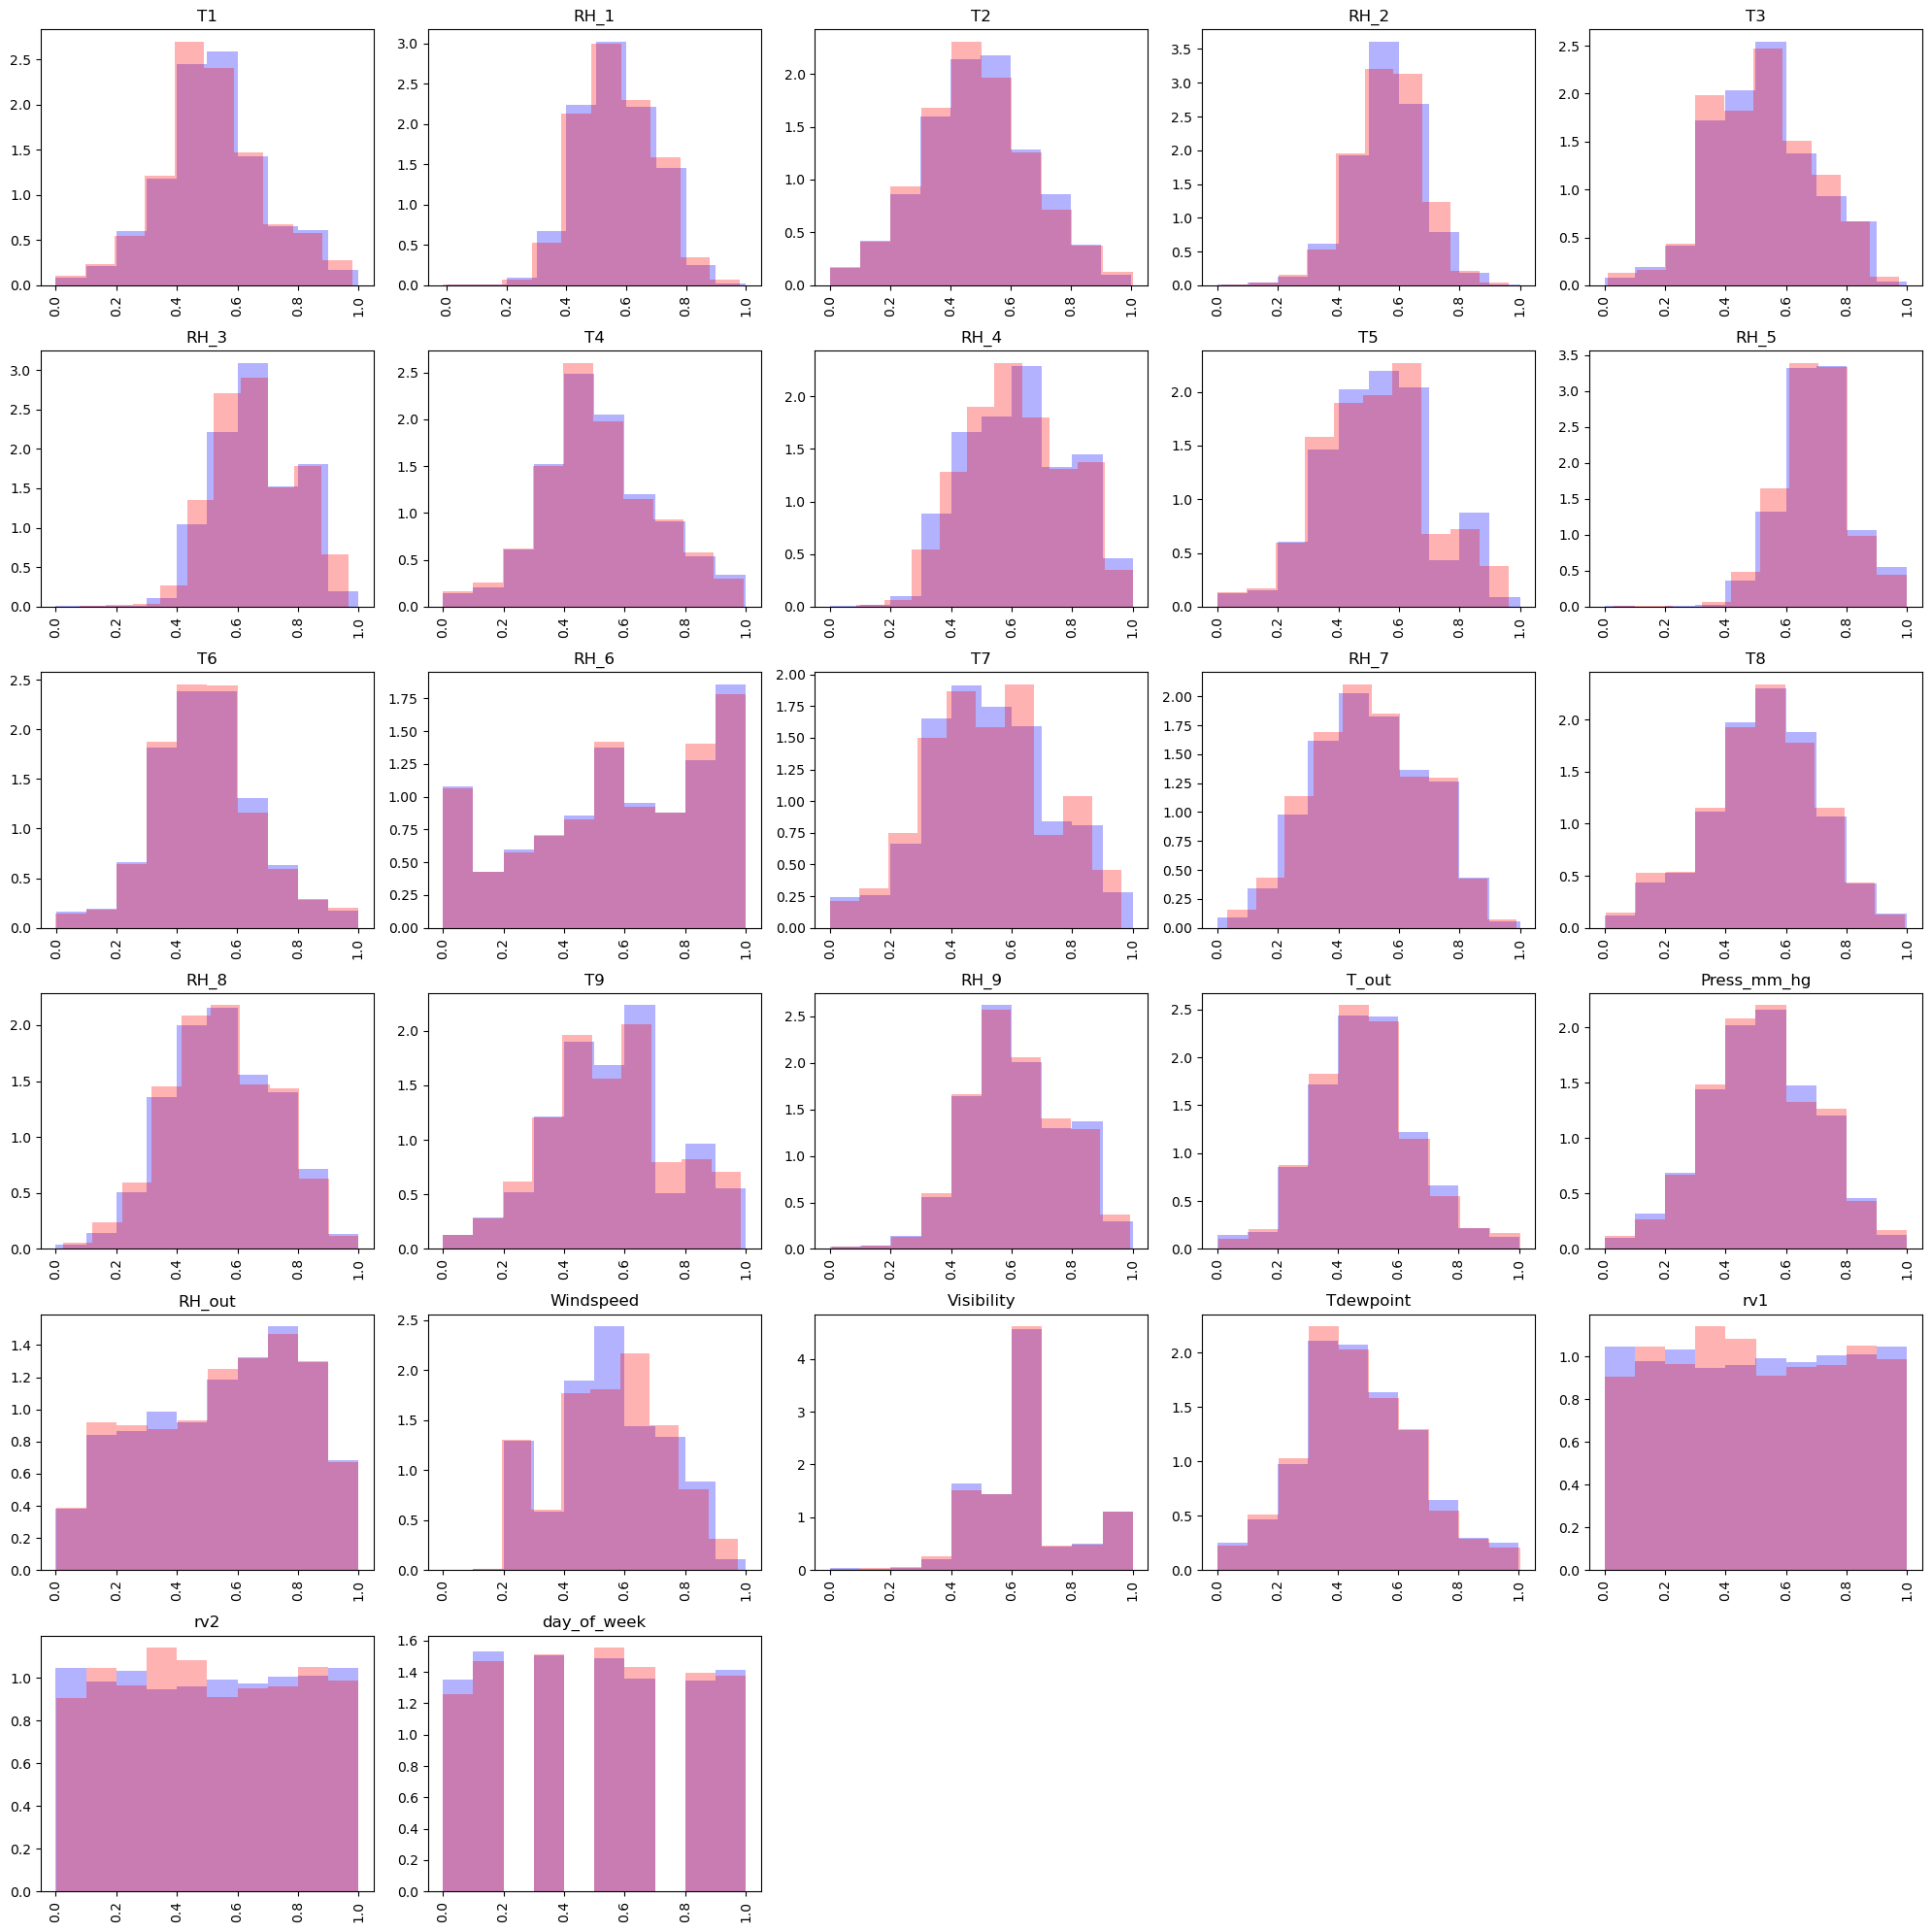

In [107]:
#plot all histograms after scaling and normalisation
plt.figure(figsize=(20,20))
for i, col in enumerate(LR_X_train_scaled.columns):
    plt.subplot(6,5,i+1)
    plt.hist(LR_X_train_scaled[col], alpha=0.3, color='b', density=True)
    plt.hist(LR_X_val_scaled[col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')
    plt.tight_layout()

In [120]:
#fitting a linear regression model
model_scaled_lr = LinearRegression().fit(LR_X_train_scaled, LR_y_train)

print("Linear Model Parameters: ", LR_energyUse.coef_)
print("Linear Model Intercept: ", LR_energyUse.intercept_)

Linear Model Parameters:  [ 4.05421058e+01  1.45629901e+02 -2.45834444e+01 -5.56474675e+01
  1.69827347e+01 -2.44872884e+01  3.25095471e+01  4.01404700e+01
  1.27684797e+01  2.27900456e+01  5.08273396e+01  6.12118954e-01
 -3.44808482e+01  1.83832754e+00  9.71834677e+01 -8.53124508e+01
 -1.09512156e+02 -4.79857981e+01 -1.11652437e+01 -3.65155574e+00
  1.02702533e+01  1.51241256e+01  7.07376802e-01 -1.68574678e+01
 -4.97734092e+14  4.97734092e+14  1.41570669e+00]
Linear Model Intercept:  30.507326567212843


C:\Users\kylie\AppData\Local\Temp\ipykernel_14956\3414004870.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  energyUse_LinearRegression.scatter(LR_y_val, LR_y_val_pred_scaled, s=25, cmap=plt.cm.coolwarm, zorder=10)


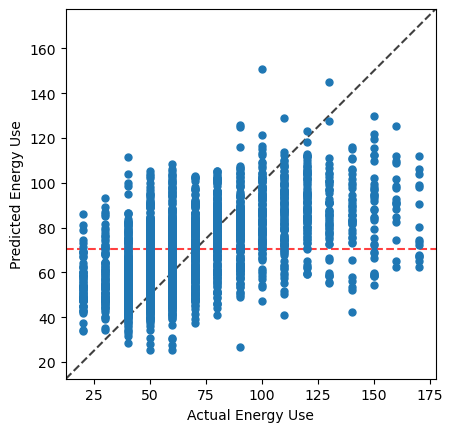

In [121]:
#predicting using linear model and plotting predicted vs actual values
LR_y_val_pred_scaled = LR_energyUse.predict(LR_X_val_scaled)

fig, energyUse_LinearRegression = plt.subplots()
energyUse_LinearRegression.scatter(LR_y_val, LR_y_val_pred_scaled, s=25, cmap=plt.cm.coolwarm, zorder=10)

lims = [
    np.min([energyUse_LinearRegression.get_xlim(), energyUse_LinearRegression.get_ylim()]),
    np.max([energyUse_LinearRegression.get_xlim(), energyUse_LinearRegression.get_ylim()]),
]

energyUse_LinearRegression.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
energyUse_LinearRegression.plot(lims, [np.mean(LR_y_train),]*2, 'r--', alpha=0.75, zorder=0)
energyUse_LinearRegression.set_aspect('equal')
energyUse_LinearRegression.set_xlim(lims)
energyUse_LinearRegression.set_ylim(lims)

plt.xlabel('Actual Energy Use')
plt.ylabel('Predicted Energy Use')

plt.show()

C:\Users\kylie\AppData\Local\Temp\ipykernel_14956\4198425697.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(LR_y_val, LR_y_val-LR_y_val_pred_scaled, s=25, cmap=plt.cm.coolwarm, zorder=10)


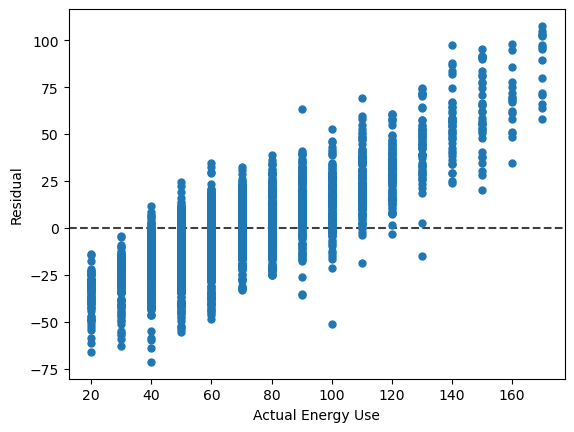

In [142]:
fig, ax = plt.subplots()
ax.scatter(LR_y_val, LR_y_val-LR_y_val_pred_scaled, s=25, cmap=plt.cm.coolwarm, zorder=10)

xlims = ax.get_xlim()
ax.plot(xlims, [0.0,]*2, 'k--', alpha=0.75, zorder=0)
ax.set_xlim(xlims)

plt.xlabel('Actual Energy Use')
plt.ylabel('Residual')

plt.show()

In [124]:
#scaled
r2_lr = r2_score(LR_y_val, LR_y_val_pred_scaled)

print('The R^2 score for the linear regression model (with feature scaling) is: {:.3f}'.format(r2_lr))

MSE_lr = np.square(np.subtract(LR_y_val,LR_y_val_pred_scaled)).mean() 
RMSE_lr = math.sqrt(MSE_lr)

print('The RMSE score for the linear regression model (with feature scaling) is: {:.3f}'.format(RMSE_lr))

The R^2 score for the linear regression model (with feature scaling) is: 0.309
The RMSE score for the linear regression model (with feature scaling) is: 24.944


In [113]:
#trying to use date to see if that makes model perform better
energyUse_df['date'] = pd.to_datetime(energyUse_df['date'], format="%Y-%m-%d %H:%M:%S")
energyUse_df['day_of_week'] = energyUse_df['date'].dt.dayofweek

#split the dataset into 70% train and 15% test and 15% val
with pd.option_context('mode.chained_assignment', None):
    LR_train, LR_test = train_test_split(energyUse_df, test_size=0.3, shuffle=True, random_state = 42)
    LR_test, LR_val = train_test_split(LR_test, test_size=0.5, shuffle=True, random_state = 42)

#Separate the target and the attributes
LR_X_train = LR_train.drop(['TARGET_energy', 'date'], axis=1)
LR_y_train = LR_train['TARGET_energy']

LR_X_test = LR_test.drop(['TARGET_energy', 'date'], axis=1)
LR_y_test = LR_test['TARGET_energy']

LR_X_val = LR_val.drop(['TARGET_energy', 'date'], axis=1)
LR_y_val = LR_val['TARGET_energy']

print("LR_X_train shape: ", LR_X_train.shape)
print("LR_y_train shape: ", LR_y_train.shape)
print("LR_X_test shape: ", LR_X_test.shape)
print("LR_y_test shape: ", LR_y_test.shape)
print("LR_X_val shape: ", LR_X_val.shape)
print("LR_y_val shape: ", LR_y_val.shape)


LR_X_train shape:  (12267, 27)
LR_y_train shape:  (12267,)
LR_X_test shape:  (2629, 27)
LR_y_test shape:  (2629,)
LR_X_val shape:  (2629, 27)
LR_y_val shape:  (2629,)


In [114]:
#scaling all features, normalising skewed features
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

logNorm_attributes = ['RH_1', 'T2', 'T3', 'RH_3', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility']
minmax_attributes = list(set(energyUse_df_X.columns).difference(set(logNorm_attributes)))

LR_X_train_scaled = LR_X_train.copy()
LR_X_val_scaled = LR_X_val.copy()

minmaxscaler = MinMaxScaler().fit(LR_X_train_scaled.loc[:, minmax_attributes])
LR_X_train_scaled.loc[:, minmax_attributes] = minmaxscaler.transform(LR_X_train_scaled.loc[:, minmax_attributes])
LR_X_val_scaled.loc[:, minmax_attributes] = minmaxscaler.transform(LR_X_val_scaled.loc[:, minmax_attributes])

powertransformer = PowerTransformer(method='yeo-johnson', standardize=False).fit(LR_X_train.loc[:, logNorm_attributes])
LR_X_train_scaled.loc[:, logNorm_attributes] = powertransformer.transform(LR_X_train.loc[:, logNorm_attributes])
LR_X_val_scaled.loc[:, logNorm_attributes] = powertransformer.transform(LR_X_val.loc[:, logNorm_attributes])

minmaxscaler_pt = MinMaxScaler().fit(LR_X_train_scaled.loc[:, logNorm_attributes])
LR_X_train_scaled.loc[:, logNorm_attributes] = minmaxscaler_pt.transform(LR_X_train_scaled.loc[:, logNorm_attributes])
LR_X_val_scaled.loc[:, logNorm_attributes] = minmaxscaler_pt.transform(LR_X_val_scaled.loc[:, logNorm_attributes])

Linear Model Parameters:  [ 4.05421058e+01  1.45629901e+02 -2.45834444e+01 -5.56474675e+01
  1.69827347e+01 -2.44872884e+01  3.25095471e+01  4.01404700e+01
  1.27684797e+01  2.27900456e+01  5.08273396e+01  6.12118954e-01
 -3.44808482e+01  1.83832754e+00  9.71834677e+01 -8.53124508e+01
 -1.09512156e+02 -4.79857981e+01 -1.11652437e+01 -3.65155574e+00
  1.02702533e+01  1.51241256e+01  7.07376802e-01 -1.68574678e+01
 -4.97734092e+14  4.97734092e+14  1.41570669e+00]
Linear Model Intercept:  30.507326567212843


C:\Users\kylie\AppData\Local\Temp\ipykernel_14956\1618451614.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  energyUse_wDayOfWeek_LinearRegression.scatter(LR_y_val, LR_y_val_pred_dayOfWeek, s=25, cmap=plt.cm.coolwarm, zorder=10)


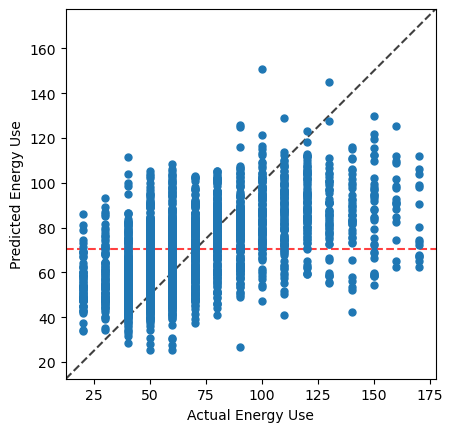

In [125]:
#fitting a linear regression model
LR_energyUse_wDayOfWeek = LinearRegression().fit(LR_X_train_scaled, LR_y_train)

print("Linear Model Parameters: ", LR_energyUse_wDayOfWeek.coef_)
print("Linear Model Intercept: ", LR_energyUse_wDayOfWeek.intercept_)

#predicting using linear model and plotting predicted vs actual values
LR_y_val_pred_dayOfWeek = LR_energyUse_wDayOfWeek.predict(LR_X_val_scaled)

fig, energyUse_wDayOfWeek_LinearRegression = plt.subplots()
energyUse_wDayOfWeek_LinearRegression.scatter(LR_y_val, LR_y_val_pred_dayOfWeek, s=25, cmap=plt.cm.coolwarm, zorder=10)

lims = [
    np.min([energyUse_wDayOfWeek_LinearRegression.get_xlim(), energyUse_wDayOfWeek_LinearRegression.get_ylim()]),
    np.max([energyUse_wDayOfWeek_LinearRegression.get_xlim(), energyUse_wDayOfWeek_LinearRegression.get_ylim()]),
]

energyUse_wDayOfWeek_LinearRegression.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
energyUse_wDayOfWeek_LinearRegression.plot(lims, [np.mean(LR_y_train),]*2, 'r--', alpha=0.75, zorder=0)
energyUse_wDayOfWeek_LinearRegression.set_aspect('equal')
energyUse_wDayOfWeek_LinearRegression.set_xlim(lims)
energyUse_wDayOfWeek_LinearRegression.set_ylim(lims)

plt.xlabel('Actual Energy Use')
plt.ylabel('Predicted Energy Use')

plt.show()

C:\Users\kylie\AppData\Local\Temp\ipykernel_14956\2352115205.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(LR_y_val, LR_y_val_pred_dayOfWeek, s=25, cmap=plt.cm.coolwarm, zorder=10)


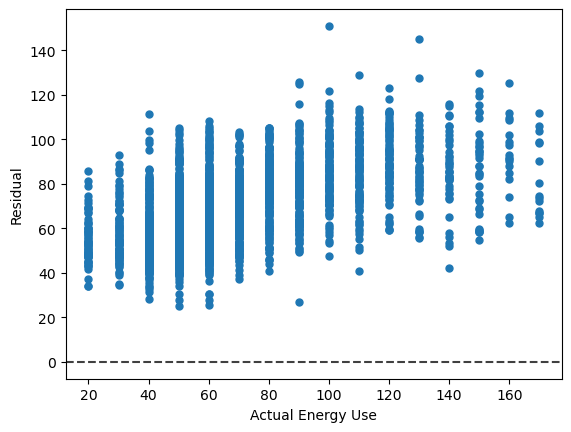

In [132]:
fig, ax = plt.subplots()
ax.scatter(LR_y_val, LR_y_val-LR_y_val_pred_dayOfWeek, s=25, cmap=plt.cm.coolwarm, zorder=10)

xlims = ax.get_xlim()
ax.plot(xlims, [0.0,]*2, 'k--', alpha=0.75, zorder=0)
ax.set_xlim(xlims)

plt.xlabel('Actual Energy Use')
plt.ylabel('Residual')

plt.show()

In [131]:
#scaled + dayOfWeek
r2_lr = r2_score(LR_y_val, LR_y_val_pred_dayOfWeek)

print('The R^2 score for the linear regression model (with feature scaling + dayOfWeek) is: {:.3f}'.format(r2_lr))

MSE_lr = np.square(np.subtract(LR_y_val,LR_y_val_pred_dayOfWeek)).mean() 
RMSE_lr = math.sqrt(MSE_lr)

print('The RMSE score for the linear regression model (with feature scaling + dayOfWeek) is: {:.3f}'.format(RMSE_lr))

The R^2 score for the linear regression model (with feature scaling + dayOfWeek) is: 0.309
The RMSE score for the linear regression model (with feature scaling + dayOfWeek) is: 24.944


### Decision Tree

In [ ]:
# split the dataset into 3 subsets, train, test and validation
from sklearn.model_selection import train_test_split

with pd.option_context('mode.chained_assignment', None):
    NN_train, NN_test = train_test_split(energyUse_df_noDate, test_size=0.3, shuffle=True,random_state=42)
    
with pd.option_context('mode.chained_assignment', None):
    NN_test, NN_val = train_test_split(NN_test, test_size=0.5, shuffle=True,random_state=42)
    
#separate target from the subsets
NN_X_train = NN_train.drop(columns=["TARGET_energy"])
NN_y_train = NN_train["TARGET_energy"]

NN_X_test = NN_test.drop(columns=["TARGET_energy"])
NN_y_test = NN_test["TARGET_energy"]
                      
NN_X_val = NN_val.drop(columns=["TARGET_energy"])
NN_y_val = NN_val["TARGET_energy"]

print("X Train Shape: ", NN_X_train.shape, " X Test Shape: ", NN_X_test.shape," X Val Shape: ", NN_X_val.shape)
print("Y Train Shape: ", NN_y_train.shape, " Y Test Shape: ", NN_y_test.shape," Y Val Shape: ", NN_y_val.shape)
print(energyUse_df_noDate.shape)

#NOTE: hopefully its the same subsets!

X Train Shape:  (12267, 26)  X Test Shape:  (2629, 26)  X Val Shape:  (2629, 26)
Y Train Shape:  (12267,)  Y Test Shape:  (2629,)  Y Val Shape:  (2629,)
(17525, 27)


In [ ]:
#fitting a basic decision tr
from sklearn import tree

tree_max_depth = 2 #this will be tuned

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=tree_max_depth, class_weight='balanced')
clf = clf.fit(NN_X_train, NN_y_train)

In [ ]:
from sklearn.metrics import f1_score

#function to calculate the f1 scores for training and validation subsets
def get_acc_scores(clf, train_X, train_y, val_X, val_y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    
    train_acc = f1_score(train_y, train_pred, average='macro')
    val_acc = f1_score(val_y, val_pred, average='macro')
    
    return train_acc, val_acc

#scores for the base decision tree model
NN_train_acc, NN_val_acc = get_acc_scores(clf,NN_X_train, NN_y_train, NN_X_val, NN_y_val)
print("Train f1 score: {:.3f}".format(NN_train_acc))
print("Validation f1 score: {:.3f}".format(NN_val_acc))

Train f1 score: 0.024
Validation f1 score: 0.026


### Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

#tuning parametes max depth and min samples split
parameters = {'max_depth': np.arange(2,200,25), 'min_samples_split':np.arange(2,50,5)}

dt_clf = tree.DecisionTreeClassifier(criterion='entropy', class_weight='balanced')
Gridclf = GridSearchCV(dt_clf, parameters, scoring='f1_macro')
Gridclf.fit(NN_X_train, NN_y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='entropy'),
             param_grid={'max_depth': array([  2,  27,  52,  77, 102, 127, 152, 177]),
                         'min_samples_split': array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47])},
             scoring='f1_macro')

In [ ]:
pd.DataFrame(Gridclf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.106472,0.001350,0.003198,0.000405,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.008950,0.023713,0.009364,0.024047,0.011142,0.015443,0.006929,71
1,0.105994,0.002133,0.003401,0.000488,2,7,"{'max_depth': 2, 'min_samples_split': 7}",0.008950,0.023713,0.009364,0.024047,0.011142,0.015443,0.006929,71
2,0.111025,0.006661,0.004075,0.000097,2,12,"{'max_depth': 2, 'min_samples_split': 12}",0.008950,0.023713,0.009364,0.024047,0.011142,0.015443,0.006929,71
3,0.106013,0.003349,0.003702,0.000597,2,17,"{'max_depth': 2, 'min_samples_split': 17}",0.008950,0.023713,0.009364,0.024047,0.011142,0.015443,0.006929,71
4,0.106060,0.001372,0.003402,0.000487,2,22,"{'max_depth': 2, 'min_samples_split': 22}",0.008950,0.023713,0.009364,0.024047,0.011142,0.015443,0.006929,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.774242,0.031249,0.003846,0.000405,177,27,"{'max_depth': 177, 'min_samples_split': 27}",0.128249,0.134069,0.140414,0.128477,0.129309,0.132103,0.004664,42
76,0.750481,0.038408,0.004020,0.000659,177,32,"{'max_depth': 177, 'min_samples_split': 32}",0.114735,0.132710,0.137915,0.126760,0.127699,0.127964,0.007721,43
77,0.743887,0.019142,0.006705,0.002781,177,37,"{'max_depth': 177, 'min_samples_split': 37}",0.112801,0.127722,0.135953,0.122864,0.123864,0.124641,0.007502,52
78,0.751391,0.028505,0.004539,0.001138,177,42,"{'max_depth': 177, 'min_samples_split': 42}",0.110134,0.121355,0.134614,0.118948,0.124629,0.121936,0.007957,62


In [ ]:
#get the model with the best score
print(Gridclf.best_score_)
print(Gridclf.best_params_)

clf = Gridclf.best_estimator_

0.18512239191326801
{'max_depth': 152, 'min_samples_split': 2}


In [ ]:
#get the f1 scores of the best model
NN_train_acc, NN_val_acc = get_acc_scores(clf,NN_X_train, NN_y_train, NN_X_val, NN_y_val)
print("Train f1 score: {:.3f}".format(NN_train_acc))
print("Validation f1 score: {:.3f}".format(NN_val_acc))

Train f1 score: 1.000
Validation f1 score: 0.192
